In [21]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import sklearn







In [22]:
    #load cifar10 dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
	numPfSamples,imgWidth,imgHeight,numOfchannels=trainX.shape
	print("[INFO] Original cifar10 dataset of trainData shape {}".format(trainX.shape))
	print("[INFO] Original cifar10 dataset of trainLabels shape {}".format(trainY.shape))
	print("[INFO] Original cifar10 dataset of testData shape {}".format(testX.shape))
	print("[INFO] Original cifar10 dataset of testLabels shape {}".format(testY.shape))
	print("[INFO] labels in cifar10 are {}".format(labels)) 


[INFO] Original cifar10 dataset of trainData shape (50000, 32, 32, 3)
[INFO] Original cifar10 dataset of trainLabels shape (50000, 1)
[INFO] Original cifar10 dataset of testData shape (10000, 32, 32, 3)
[INFO] Original cifar10 dataset of testLabels shape (10000, 1)
[INFO] labels in cifar10 are ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
def drarwGridOfImagesFromImagesData(images,fileNameToSaveImage=None):



  # Parameters for our graph; we'll output images in a 4x4 configuration
  nrows = 4
  ncols = 4
 
     
  pic_index = 0 # Index for iterating over images

  #display a batch of 4*4 pictures

  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)



  for i in range(16):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = images[i]
    plt.imshow(img)
 
  if(fileNameToSaveImage != None):
    plt.savefig(fileNameToSaveImage)
  plt.show()


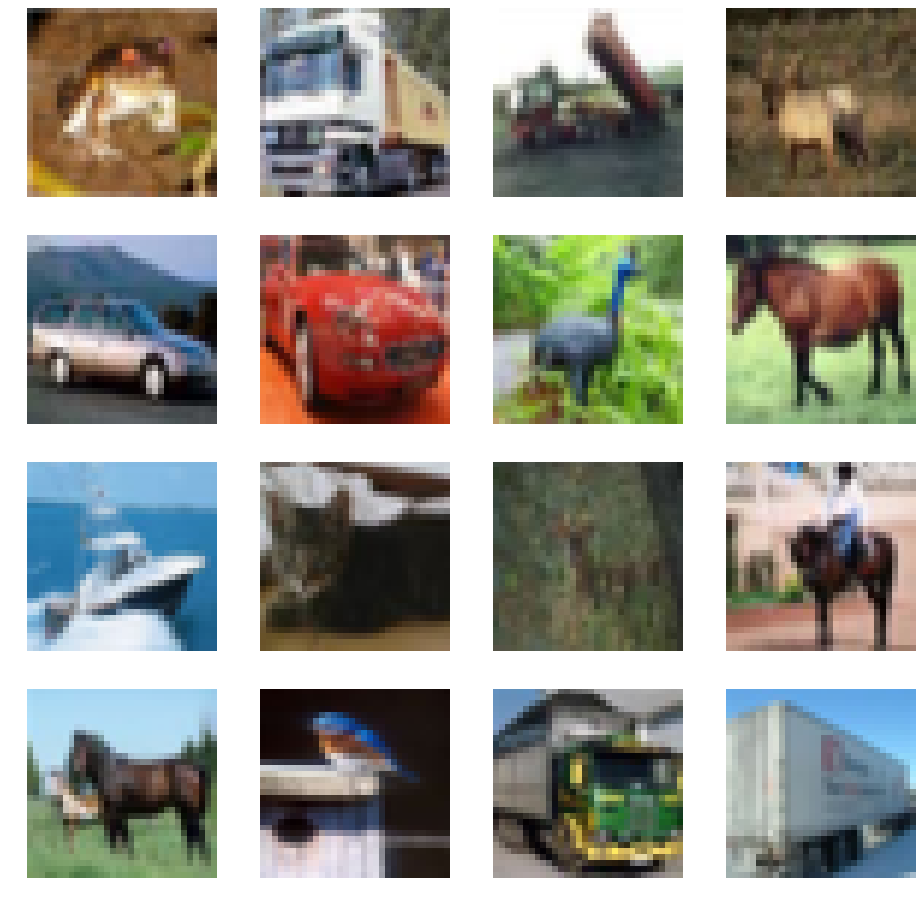

In [14]:
drarwGridOfImagesFromImagesData(trainX)

In [15]:
	trainX = trainX.astype("float32") / 255.0
	testX = testX.astype("float32") / 255.0
	lb = LabelBinarizer()
	trainY = lb.fit_transform(trainY)
	testY = lb.fit_transform(testY)
	print("[INFO] Data ready for training")

[INFO] Data ready for training


In [16]:
	#tuning parameters
	weight_decay = 1e-4
	INIT_LR = 1e-3
	EPOCHS=25
	BS=32

In [17]:
	#define model
	model = tf.keras.models.Sequential()
	model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32,32,3)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.2))	 
	model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.3))	 
	model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.4))
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(10, activation="softmax"))
	model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [18]:
    #compile model
	opt = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
	model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
	print("[INFO] Model compiled")

[INFO] Model compiled


In [19]:
	# train the network
	print("[INFO] training network...")
	aug = ImageDataGenerator()
	history = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS, verbose=1)
	model.save("cifar10model.keras2")
	print("[INFO] Model saved to {}".format("cifar10model.keras2"))

[INFO] training network...
Epoch 1/25
1562/1562 [==============================] - 694s 445ms/step - loss: 1.6424 - accuracy: 0.4978 - val_loss: 1.0295 - val_accuracy: 0.6612
Epoch 2/25
1562/1562 [==============================] - 3140s 2s/step - loss: 1.0432 - accuracy: 0.6597 - val_loss: 0.9524 - val_accuracy: 0.7002
Epoch 3/25
1562/1562 [==============================] - 3930s 3s/step - loss: 0.8859 - accuracy: 0.7177 - val_loss: 0.9720 - val_accuracy: 0.6885
Epoch 4/25
1562/1562 [==============================] - 831s 532ms/step - loss: 0.8007 - accuracy: 0.7518 - val_loss: 0.7934 - val_accuracy: 0.7555
Epoch 5/25
1562/1562 [==============================] - 1093s 700ms/step - loss: 0.7330 - accuracy: 0.7777 - val_loss: 0.7202 - val_accuracy: 0.7866
Epoch 6/25
1562/1562 [==============================] - 7364s 5s/step - loss: 0.6874 - accuracy: 0.7974 - val_loss: 0.7367 - val_accuracy: 0.7873
Epoch 7/25
1562/1562 [==============================] - 13425s 9s/step - loss: 0.6452 - ac

W1116 13:30:21.289164 4456306112 deprecation.py:506] From /Users/walidahmed/anaconda2/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[INFO] Model saved to cifar10model.keras2


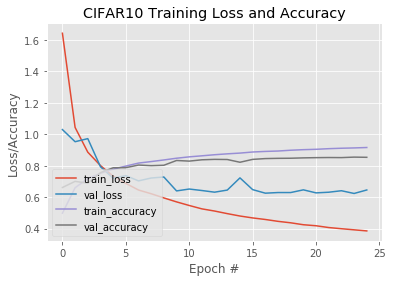

In [20]:
	#draw training curves	
	acc      = history.history[     'accuracy' ]
	val_acc  = history.history[ 'val_accuracy' ]
	loss     = history.history[    'loss' ]
	val_loss = history.history['val_loss' ]   
	epochs   = range(len(acc)) # Get number of epochs
	plt.style.use("ggplot")
	plt.figure()
	plt.plot(epochs, loss, label="train_loss")
	plt.plot(epochs, val_loss, label="val_loss")
	plt.plot(epochs, acc, label="train_accuracy")
	plt.plot(epochs, val_acc, label="val_accuracy")
	plt.title("CIFAR10 Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")
	plt.show()

In [ ]:
	# evaluate the network
	print("[INFO] evaluating network...")
	predictions = model.predict(testX, batch_size=32)
	y_true=testY.argmax(axis=1)
	y_pred=predictions.argmax(axis=1)
	print(classification_report(y_true,y_pred, target_names=labels))
	print(confusion_matrix(y_true, y_pred))
	print(labels)